<a href="https://colab.research.google.com/github/amorelo01/IA_UdeA_AndresZ/blob/main/M3_S2_Estandarizacion_Normalizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="banner" height="252px" width="1080px" src="https://docs.google.com/uc?export=download&id=18D9zTLyHjMFbwtI2Eenr0l5oGeH9a1Wq"  align="center" hspace="10px" vspace="0px" ></p>

# <font color='056938'> **Introducción** </font>

El escalado de características (*feature scaling*) es una técnica de preprocesamiento que transforma los valores de las características a una escala similar, asegurando que todas las características contribuyan de manera equitativa al modelo. Es esencial para conjuntos de datos con características de rangos, unidades o magnitudes variables.

El escalado de características ofrece varios beneficios, especialmente al trabajar con modelos de aprendizaje automático:

* **Mejora el rendimiento del modelo**: Muchos modelos, especialmente los que se basan en cálculos de distancia, dependen de la escala de las características. El escalado asegura que cada característica contribuya de manera equitativa, evitando que las características con valores más grandes dominen.

* **Convergencia más rápida**: Algoritmos como el *gradient descent*  funcionan mejor y convergen más rápido cuando las características están en la misma escala

* **Previene el sesgo**: Sin escalado de características, las características con magnitudes más grandes podrían influir desproporcionadamente en el modelo, lo que llevaría a resultados sesgados.

* **Mejor interpretabilidad**: Escalar las características facilita la interpretación de la importancia de cada una, especialmente en modelos que usan coeficientes (como la regresión lineal o logística), ya que los coeficientes no estarán dominados por la escala de las características.

* **Consistencia entre características**: Para modelos que combinan diferentes tipos de características (por ejemplo, numéricas y categóricas), el escalado asegura que el modelo no favorezca características solo porque tienen diferentes unidades o rangos.




## <font color='8EC044'> **¿Qué impacto tiene el escalar los datos?** </font>

Considere el siguiente ejemplo, en el que en un programa de riesgo cardiovascular deseamos agrupar un conjunto de personas de acuerdo a su similaridad en peso y estatura.

Hemos usado el  algoritmo de agrupación `k-means` (el cual discutiremos en el siguiente curso de la linea) para llevar a cabo esta tarea. En el hemos usado los datos sin escalar y despues de escalar: **¿Qué diferencia observa?**

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

data = {
    'Estatura (m)': [1.69, 1.98, 1.87, 1.80, 1.58, 1.58, 1.53, 1.93, 1.80, 1.85,
           1.51, 1.99, 1.92, 1.61, 1.59, 1.59, 1.65, 1.76, 1.72, 1.65],
    'Peso (kg)': [80.59, 76.97, 68.61, 68.32, 72.80, 89.26, 59.98, 85.71, 79.62, 62.32,
                    80.38, 98.53, 83.25, 77.44, 98.28, 60.42, 65.23, 64.88, 84.21, 72.01]
}
df = pd.DataFrame(data)
df_scaled = df.copy()

# Fit the model to the unscaled data
kmeans = KMeans(n_clusters=3, n_init= 10,random_state=42)
kmeans.fit(df)
labels = kmeans.labels_
df['Cluster'] = labels

# Fit the model  with scaled data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_scaled[['Estatura (m)', 'Peso (kg)']])
kmeans = KMeans(n_clusters=3, n_init= 10, random_state=42)
kmeans.fit(scaled_data)
labels = kmeans.labels_
df_scaled['Cluster'] = labels


# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=['Sin escalar', 'Escalados'])

# Add traces to subplots
fig.add_trace(go.Scatter(x=df['Estatura (m)'], y=df['Peso (kg)'],
                         mode='markers', marker_color=df['Cluster'], marker_size=10, showlegend=False), row=1, col=1)
fig.add_trace(go.Scatter(x=df_scaled['Estatura (m)'], y=df_scaled['Peso (kg)'],
                         mode='markers', marker_color=df_scaled['Cluster'], marker_size=10, showlegend=False), row=1, col=2)

# Update layout
fig.update_layout(title='Estatura (m) vs Peso (kg)', xaxis1_title='Estatura (m)', xaxis2_title='Estatura (m)',
                  yaxis1_title='Peso (kg)', yaxis2_title='Peso (kg)')

fig.show()

## <font color='8EC044'> **Rescalar, normalizar, estandarizar** </font>

El término escalamiento, normalización y estandarización se usan frecuentemente en ciencia de datos. Algunas veces se usan de forma  intercambiable. sin embargo, en aras de estructurar la discusión vamos a definir brevemente cada uno de ellos:

* <font color='46B8A9'> **Reescalar** </font> un vector significa sumar o restar una constante y luego multiplicar o dividir por una constante, como lo harías para cambiar las unidades de medida de los datos, por ejemplo, para convertir una temperatura de Celsius a Fahrenheit.

* <font color='46B8A9'> **Normalizar** </font>  un vector, con mayor frecuencia, significa dividir por una norma del vector, por ejemplo,reescalar por el mínimo y el rango del vector, para hacer que todos los elementos queden entre 0 y 1.

* <font color='46B8A9'> **Estandarizar** </font>  un vector, con mayor frecuencia, significa restar una medida de localización y dividir por una medida de escala. Por ejemplo, si el vector contiene valores aleatorios con una distribución gaussiana, podrías restar la media y dividir por la desviación estándar, obteniendo así una variable aleatoria "normal estándar" con media 0 y desviación estándar 1.

Algunas de las técnicas más comunes se resumen en la siguiente tabla.



<img src="https://docs.google.com/uc?export=download&id=1k7c1Xz4lcKqQeCWYIaKH_CD3e2MW210R" alt="picture" width="100%">

# <font color='056938'> **Normalización** </font>

Esto es una técnica utilizada en el preprocesamiento de datos para modificar y ajustar los valores de las variables y escalarlas en el conjunto de datos común. En la normalización los valores se desplazan y reescalan para que terminen en un rango dado. Por ejemplo entre $[0, 1]$ o  $[-1, 1]$.

La normalización es útil cuando no hay valores atípicos ya que no puede manejarlos.  Es posible usar distintos tipos de norma al escalar los datos y eso permite diferenciar entre diferentes operadores




### <font color='157699'> **Min-Max scaling** </font>


Es una técnica de escalado de datos en la que los puntos de datos se desplazan y reescalan para que terminen en un rango de 0 a 1. También se conoce como *min-max scaling*.

La fórmula para calcular la puntuación normalizada:

> $x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}$

Donde:

* $x_{norm}$: es el valor normalizado.
* $x$: es el valor original.
* $x_{min}$: es el valor mínimo de la característica.
* $x_{max}$: es el valor máximo de la característica.


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000)
# get some negative values
for i in range(len(original_data)):
  if np.random.uniform() < 0.1:
    original_data[i]=-original_data[i]

df = pd.DataFrame({'original_data': original_data})
# Create a MinMaxScaler object
scaler = MinMaxScaler()
df['scaled_data'] = scaler.fit_transform(df[['original_data']])
df.head()

,original_data,scaled_data
0,0.923614,0.498864
1,0.039960,0.416861
2,0.504273,0.459949
3,0.434741,0.453496
4,1.605153,0.562111


Creamos esta función para que pueda usarse despues

In [ ]:
# creamos esta función para que pueda usarse despues
def compare_plot(df):
  # Create subplots
  fig = make_subplots(rows=1, cols=2, subplot_titles=['Sin escalar', 'Escalados'])

  # Add traces to subplots
  fig.add_trace(go.Histogram(x=df['original_data'], showlegend=False),row=1, col=1)
  fig.add_trace(go.Histogram(x=df['scaled_data'], showlegend=False), row=1, col=2)

  return fig

In [ ]:
fig = compare_plot(df)
fig.show()

### <font color='157699'> **MaxAbs scaling** </font>

Este estimador escala de manera que el valor absoluto máximo de cada característica en el conjunto de entrenamiento será 1.0. Es similar a `Min-Max`, excepto que los valores se asignan a varios rangos dependiendo de si están presentes valores negativos o positivos. Si solo están presentes valores positivos, el rango es `[0, 1]`. Si solo están presentes valores negativos, el rango es `[-1, 0]`. Si están presentes valores positivos y negativos, el rango es `[-1, 1]`. En datos solo positivos, tanto `Min-Max` como `Max-Abs` se comportan de manera similar.

> $x_{\text{scaled}} = \frac{x}{\max(|X|)}$

donde:
- $x$ es el valor original de la característica.
- $\max(|X|)$ es el valor absoluto máximo en la característica.
- $x_{\text{scaled}}$ es el valor escalado.

Este método de escalado transforma los datos para que estén en el rango de $[-1, 1]$, manteniendo la proporción original entre los valores. Es útil cuando los datos tienen valores dispersos y se desea mantener la distribución original de los datos.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MaxAbsScaler

# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000)
# get some negative values
for i in range(len(original_data)):
  if np.random.uniform() < 0.1:
    original_data[i]=-original_data[i]
df = pd.DataFrame({'original_data': original_data})

# Create a MinMaxScaler object
scaler = MaxAbsScaler()
df['scaled_data'] = scaler.fit_transform(df[['original_data']])
df

,original_data,scaled_data
0,-0.155225,-0.021087
1,-1.238370,-0.168227
2,0.799682,0.108633
3,-0.328814,-0.044668
4,0.424751,0.057701
...,...,...
995,0.118037,0.016035
996,1.492252,0.202716
997,1.000855,0.135962
998,1.184425,0.160899


In [ ]:
fig = compare_plot(df)
fig.show()

# <font color='056938'> **Estandarización** </font>


La estandarización se basa principalmente en las tendencias centrales y la varianza de los datos, transfora los datos para centrarlos eliminando el valor de una medida de tendencia central de cada característica y escala con base en una medida de dispersión.

### <font color='157699'> **Standar scaling** </font>

Corresponde la estandarización de los datos de los datos alrededor de la media 0 y con una desviación estándar de 1. Es apropiada en aquellos casos en que la distribución de los datos es normal, aunque usualmente también se aplica cuando dicha distribucipon es desconocida.

Claro, la fórmula de la estandarización de un dato \( x \) para una característica en particular se expresa en LaTeX de la siguiente manera:

> $z = \frac{x - \mu}{\sigma}$

donde:
- $x$ es el valor original de la característica.
- $\mu$ es la media de la característica.
- $\sigma$ es la desviación estándar de la característica.
- $z$ es el valor estandarizado.

Esto transforma el valor $x$ en un valor $z$ que tiene una media de $0$ y una desviación estándar de $1$.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000)
# get some negative values
for i in range(len(original_data)):
  if np.random.uniform() < 0.1:
    original_data[i]=-original_data[i]
df = pd.DataFrame({'original_data': original_data})

# Create a MinMaxScaler object
scaler = StandardScaler()
df['scaled_data'] = scaler.fit_transform(df[['original_data']])
df

,original_data,scaled_data
0,-0.949281,-1.568431
1,0.715951,-0.085946
2,2.480515,1.484970
3,0.371374,-0.392708
4,0.313386,-0.444332
...,...,...
995,1.557537,0.663282
996,2.164436,1.203578
997,0.487675,-0.289170
998,1.239159,0.379843


In [ ]:
fig = compare_plot(df)
fig.show()

In [ ]:
import numpy as np
np.random.seed(42)
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.normal(loc=6, scale=3, size=1000)
# get some outliers
# for i in range(len(original_data)):
#   if np.random.uniform() < 0.02:
#     original_data[i]=10*original_data[i]

df = pd.DataFrame({'original_data': original_data})

# Create a MinMaxScaler object
scaler = StandardScaler()
df['scaled_data'] = scaler.fit_transform(df[['original_data']])
fig = compare_plot(df)
fig.show()

### <font color='157699'> **Robust scaling** </font>

En la presencia de valores atípicos, es probable que el escalado utilizando la media y la varianza de los datos no funcione muy bien. En estos casos, pueden usarse estimaciones más robustas para el centro y el rango de tus datos, como la mediana y el rango intercuartílico (IQR), que son menos sensibles a la influencia de los outliers.



$x_{\text{scaled}} = \frac{x - \text{median}(X)}{\text{IQR}(X)}$

donde:
- $\text{median}(X)$ es la mediana de la característica $X$.
- $\text{IQR}(X)$ es el rango intercuartílico de la característica $X $
- $x$ es el valor original de la característica.
- $x_{\text{scaled}}$ es el valor escalado.

El Robust Scaler es útil cuando se desea reducir el efecto de valores atípicos en el preprocesamiento de datos.

In [ ]:
import numpy as np
np.random.seed(42)
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler

# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.normal(loc=6, scale=3, size=1000)
# get some outliers
for i in range(len(original_data)):
  if np.random.uniform() < 0.02:
    original_data[i]=10*original_data[i]
df = pd.DataFrame({'original_data': original_data})

# Create a MinMaxScaler object
scaler = RobustScaler()
df['scaled_data'] = scaler.fit_transform(df[['original_data']])
fig = compare_plot(df)
fig.show()

# <font color='056938'> **Reversar escalamiento** </font>

En algunos casos puede ser necesario reversar el proceso de escalamiento aplicado a una variable, para ello puede ser de utilidad la función `scaler.inverse_transform`

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000)
df = pd.DataFrame({'original_data': original_data})

# Create a MinMaxScaler object
scaler = MinMaxScaler()
df['scaled_data'] = scaler.fit_transform(df[['original_data']])

# reversa la operación
df['reversed']= scaler.inverse_transform(df[['scaled_data']])
df.head()

,original_data,scaled_data,reversed
0,0.247268,0.040343,0.247268
1,0.037413,0.006102,0.037413
2,0.114318,0.018651,0.114318
3,0.413791,0.067514,0.413791
4,1.622451,0.264723,1.622451


# <font color='056938'> **Librerias para preprocesamiento** </font>
Hemos usado las funciones para preprocesamiento de libreria `sklearn`, en particular los distintos tipos de `scalers` que ella ofrece. Sin embargo, es importante notar que existen diversas librerias que permiten funcionalidades similares tales como:

* `Scikit-learn`
* `Statsmodels`
* `Scipy`
* `Feature-engine`
* `Pandas`



Si bien, es recomendable y práctico usar las librerias y sus funciones, es importante notar que haciendo uso de los concpetos vistos hasta ahora de pandas, podriamos lograr estos mismos resultador. Por ejemplo, hacer la normalización `min-max` de una variable sin usar ninguna libreria adicional:


In [ ]:
import pandas as pd

df['min_max'] = (df['original_data']-df['original_data'].min())/(df['original_data'].max()-df['original_data'].min())
df.head()

,original_data,scaled_data,reversed,min_max
0,0.247268,0.040343,0.247268,0.040343
1,0.037413,0.006102,0.037413,0.006102
2,0.114318,0.018651,0.114318,0.018651
3,0.413791,0.067514,0.413791,0.067514
4,1.622451,0.264723,1.622451,0.264723


# <font color='056938'> **Pandas `pipeline`** </font>

Los **pipelines** desempeñan un papel útil en la transformación y manipulación de grandes cantidades de datos. Un **pipeline** es una secuencia de mecanismos de procesamiento de datos. Estos nos permite encadenar varias funciones definidas por el usuario en Python para construir una secuencia de procesamiento de datos.



Así por ejemplo. Dado un conjunto de datos, podriamos estar interesados en automatizar la aplicación de las siguientes operaciones:
> ```
  Eliminar duplicados
  Eliminar registro con datos null en ciertas columnas
  Estandarizar ciertas columnas
  ```




Para ellos sería de utilidad crear un pipeline. Veamos como funcionaria en el siguiente ejemplo:



#### <font color='46B8A9'> **Ejemplo** </font>

Considere el siguiente dataframe con los datos de registro de algunos usuarios, el tiempo activo en la plataforma, su genero, la experiencia en codificación y el ingreso mensual

In [ ]:
import pandas as pd
!gdown 16V6SHcpOeRMUewwlRZPIUtkaa3n4200d
df = pd.read_csv('registros_v3.csv')
df

Downloading...
From: https://drive.google.com/uc?id=16V6SHcpOeRMUewwlRZPIUtkaa3n4200d
To: /content/registros_v3.csv
100% 5.12k/5.12k [00:00<00:00, 13.5MB/s]


,nombre,correo,tiempo_activo,genero,Experiencia,ingreso
0,Agudelo Durango Yessela,yesselita777@yahoo.es,64,F,2,1781144
1,Agudelo Paniagua Catalina,cata9204@hotmail.com,16,F,2,2987608
2,Aguirre Monsalve Alejandra,alejandra.aguirre1@udea.edu.co,115,F,2,2796780
3,Alejandro Soto,alejandro.soto@udea.edu.co,40,M,2,1601115
4,Amaya León Alexánder,alexander.amaya@udea.edu.co,42,M,2,2159962
...,...,...,...,...,...,...
73,Velez Muñeton Jose Daniel,josed.velez1@udea.edu.co,59,M,2,1831318
74,Velez Osorno Daniel,daniel.velez4@udea.edu.co,106,M,2,2835566
75,Vergara Gomez Katherin,katherin.vergara@udea.edu.co,53,F,2,1721118
76,Villegas Escobar Ana María,analola__282@hotmail.com,32,F,2,1896718


Definimos las siguientes funciones:

* `remove_duplicates()`: Elimina registros duplicados
* `remove_nulls_columns()`: Elimina los registros que tengan valores nulos en las columnas `tiempo activo` e `ingreso`
* `scale_columns()`: Normaliza o estandariza la columnas `ingresos` y `tiempo activo`. Note que esta función recibe como uno de sus argumentos el tipo la función del tipo de escalamiento que deseamos aplicar a las variables


In [ ]:
def remove_duplicates(df):
    return df.drop_duplicates()

def remove_nulls_columns(df):
    return df.dropna(subset=['tiempo_activo', 'ingreso'])

def scale_columns(df, scaler):
    scaler = scaler
    df[['tiempo_activo', 'ingreso']] = scaler.fit_transform(df[['tiempo_activo', 'ingreso']])
    return df


Ahora enlazamos la funciones a través de un `pipe`

In [ ]:
from sklearn.preprocessing import StandardScaler


df_process = (
    df.pipe(remove_duplicates)
    .pipe(remove_nulls_columns)
    .pipe(scale_columns, scaler=StandardScaler())
)
df_process

,nombre,correo,tiempo_activo,genero,Experiencia,ingreso
0,Agudelo Durango Yessela,yesselita777@yahoo.es,-0.033960,F,2,-0.601914
1,Agudelo Paniagua Catalina,cata9204@hotmail.com,-0.563740,F,2,1.053815
2,Aguirre Monsalve Alejandra,alejandra.aguirre1@udea.edu.co,0.528931,F,2,0.791926
3,Alejandro Soto,alejandro.soto@udea.edu.co,-0.298850,M,2,-0.848982
4,Amaya León Alexánder,alexander.amaya@udea.edu.co,-0.276776,M,2,-0.082031
...,...,...,...,...,...,...
73,Velez Muñeton Jose Daniel,josed.velez1@udea.edu.co,-0.089146,M,2,-0.533056
74,Velez Osorno Daniel,daniel.velez4@udea.edu.co,0.429597,M,2,0.845155
75,Vergara Gomez Katherin,katherin.vergara@udea.edu.co,-0.155368,F,2,-0.684293
76,Villegas Escobar Ana María,analola__282@hotmail.com,-0.387147,F,2,-0.443302


#### <font color='46B8A9'> **Ejercicio** </font>

Considere el ejemplo anterior, genere un pipeline que dado el df original, realice las tareas necesarias para obtener un gráfico de dispersión (scatter) de los ingreso contra el tiempo de actividad en la plataforma

In [ ]:
# Escriba aquí su respuesta
import matplotlib.pyplot as plt

def remove_duplicates(df):
    return df.drop_duplicates()

def remove_nulls_columns(df):
    return df.dropna(subset=['tiempo_activo', 'ingreso'])

def scale_columns(df, scaler):
    scaler = scaler
    df[['tiempo_activo', 'ingreso']] = scaler.fit_transform(df[['tiempo_activo', 'ingreso']])
    return df

# def plot_scatter(df):
#   fig = df.plot.scatter(x='tiempo_activo', y='ingreso')
#   return fig


def plot_scatter(df):
  plt.scatter(df['tiempo_activo'], df['ingreso'])
  plt.xlabel('Tiempo activo en plataforma')
  plt.ylabel('Ingreso mensual')
  plt.title('Scatter: Ingreso vs Tiempo activo')
  plt.grid(True)
  plt.show()
  return df

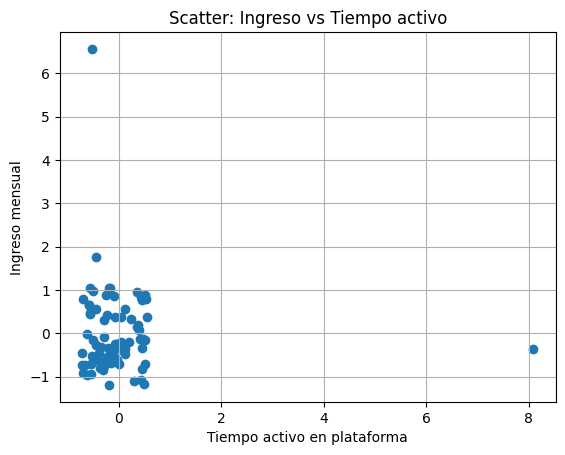

In [ ]:
scaler = StandardScaler()
df_processed = (
    df.pipe(remove_duplicates)
      .pipe(remove_nulls_columns)
      .pipe(scale_columns, scaler=scaler)
      .pipe(plot_scatter)
)


# <font color='056938'> **Reto de aplicación** </font>

Para este ejercicio, utilizaremos el conjunto de datos *Mall Customers* disponible en [Kaggle](https://www.kaggle.com/datasets/shwetabh123/mall-customers). Es un conjunto de datos  basado en un escenario hipotético. Contiene información básica sobre $200$ clientes ficticios de un centro comercial. El conjunto de datos consta de 5 columnas:

- `CustomerID`: Un identificador único para cada cliente.
- `Gender`: El género del cliente.
- `Age`: La edad del cliente.
- `Annual Income`: El ingreso anual del cliente (en miles de dólares).
- `Spending Score`: Una puntuación asignada al cliente en función de sus hábitos de gasto. La puntuación varía de 1 a 100, donde una puntuación más alta indica un cliente que gasta más.
- `Genre_Binary`: la columna `Gender` convertida a binario

Nuestro interes es segmentar los clientes en `k `grupos de clientes similares de modo que podemos hacer campañas de mercadeo específicas para cada grupo

In [ ]:
import pandas as pd

# load data
!gdown 1LELVYMHNjY7H97asN_QUtybd4UWfcG-U

# create dataframe
df = pd.read_csv('mall_customers.csv')
df = df.rename(columns={
    'Annual Income (k$)': 'Annual Income',
    'Spending Score (1-100)': 'Spending Score'
})
# Mapping Gender to binary values: M -> 1, F -> 0
df['Genre_Binary'] = df['Genre'].map({'Female': 1, 'Male': 0})
df.head()

Downloading...
From: https://drive.google.com/uc?id=1LELVYMHNjY7H97asN_QUtybd4UWfcG-U
To: /content/mall_customers.csv
100% 4.29k/4.29k [00:00<00:00, 10.9MB/s]


,CustomerID,Genre,Age,Annual Income,Spending Score,Genre_Binary
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


La siguiente función agrupa los clientes en `k` grupos, usando el algoritmo `k-means`, con base en las columnas `['Age', 'Annual Income',	'Spending Score',	'Genre_Binary']`

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def k_means(df, k, columns):
  # Fit the model to the unscaled data
  df_kmeans = df[columns]
  kmeans = KMeans(n_clusters=k, n_init= 10,random_state=42)
  kmeans.fit(df_kmeans)
  labels = kmeans.labels_
  df['Cluster'] = labels

  return df

# aplicamos la función de agrupación
k = 5
columns =  ['Age', 'Annual Income',	'Spending Score',	'Genre_Binary']
df_clustered = k_means(df, k, columns)
df_clustered.head()

,CustomerID,Genre,Age,Annual Income,Spending Score,Genre_Binary,Cluster
0,1,Male,19,15,39,0,0
1,2,Male,21,15,81,0,4
2,3,Female,20,16,6,1,0
3,4,Female,23,16,77,1,4
4,5,Female,31,17,40,1,0


Por su parte la siguiente función permite graficar las agrupaciones obtenidas con respecto a distintos pares de variables:

In [ ]:
# Create subplots
def plot_clusters(df_clustered):
  fig = make_subplots(rows=1, cols=3, subplot_titles=['Age vs Annual Income', 'Age vs Spending Score', 'Annual Income vs Spending Score'])

  # Add traces to subplots
  fig.add_trace(go.Scatter(x=df_clustered['Age'], y=df['Annual Income'],
                          mode='markers', marker_color=df['Cluster'], marker_size=10, showlegend=False), row=1, col=1)
  fig.add_trace(go.Scatter(x=df_clustered['Age'], y=df['Spending Score'],
                          mode='markers', marker_color=df['Cluster'], marker_size=10, showlegend=False), row=1, col=2)
  fig.add_trace(go.Scatter(x=df_clustered['Annual Income'], y=df['Spending Score'],
                          mode='markers', marker_color=df['Cluster'], marker_size=10, showlegend=False), row=1, col=3)

  return fig

fig = plot_clusters(df_clustered)
fig.show()

Realice las operaciones necesarias que considere, escalando las vaiables, y compare los resultados que obtiene en las agrpaciones. Use las funciones definidas (`k_means()` y `plot_clusters())` para agrupar y graficar

In [ ]:
# escriba aquí su respuesta
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler

scaler = RobustScaler()
columns =  ['Age_scaled', 'Annual Income_scaled',	'Spending Score_scaled',	'Genre_Binary_scaled']
df[columns] = scaler.fit_transform(df[['Age', 'Annual Income',	'Spending Score',	'Genre_Binary']])

k = 5
df_clustered = k_means(df, k, columns)
fig = plot_clusters(df_clustered)
fig.show()



In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
columns_to_scale = ['Age', 'Annual Income', 'Spending Score', 'Genre_Binary']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[columns_to_scale])
df_scaled = df.copy()
df_scaled[columns_to_scale] = scaled_features
df_clustered_scaled = k_means(df_scaled, k=5, columns=columns_to_scale)
fig_scaled = plot_clusters(df_clustered_scaled)
fig_scaled.show()